# **Ex3**

## Names and IDs

1.   Victor Gavrilenko 209406255
2.   Ilay Cohen 206515744


**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## 1. Fuel efficiency price prediction (35 points)
In this section we will use regression tree model for predicting the fuel efficiency for different cars


The features data available here:
https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv

The labels are here:
https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv


### Import Necessary Libraries ###

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
!pip install shap
import shap

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV



import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 11.5 MB/s eta 0:00:00


### Helper Function ###

In [2]:
def PRINT(text) -> None : print(f'{"-"*85}\n{text}\n{"-"*85}')

In [3]:
import numpy as np
# load the data
import pandas as pd
y = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv')
X = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv')


### EDA visuallization (5pts)

Explore the data. What features are meaningful? what are the correlated features? display statistcs about the data itself including it's value ranges.

#### Explore Data Analysis ####

In [4]:
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8.0,307.0,130.0,NaN,12.0,70.0,USA
1,8.0,350.0,165.0,3693.0,11.5,70.0,USA
2,NaN,318.0,150.0,3436.0,11.0,NaN,NaN
3,8.0,304.0,NaN,NaN,NaN,70.0,NaN
4,8.0,302.0,NaN,3449.0,10.5,70.0,USA


In [5]:
y.head()

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


*Insights:*

- We can clearly see that the X data frame contains numerous `NaN` values. Therefore, we will fill these values with zeros to prepare our data for training our model
- We can't clearly see if there any `NaN` values in our labels. Therefore, we will keep exploring our data

#### Data Cleaning ####

In [6]:
X_nan_counts = X.isna().sum().sum()
y_nan_counts = y.isna().sum().sum()

PRINT(f'There are -->> <{X_nan_counts}> `NaN` values in X data frame and -->> <{y_nan_counts}> in y data frame')

-------------------------------------------------------------------------------------
There are -->> <685> `NaN` values in X data frame and -->> <0> in y data frame
-------------------------------------------------------------------------------------


In [7]:
PRINT(f'Lets explore the `NaN` distribution in X data frame:\n\n{X.isna().sum()}')

-------------------------------------------------------------------------------------
Lets explore the `NaN` distribution in X data frame:

Cylinders        91
Displacement    110
Horsepower      114
Weight          105
Acceleration     93
Model Year       87
Origin           85
dtype: int64
-------------------------------------------------------------------------------------


In [8]:
PRINT(f'Total --->>>  <{X.isna().sum().sum()}>  `NaN` values in X data frame')

-------------------------------------------------------------------------------------
Total --->>>  <685>  `NaN` values in X data frame
-------------------------------------------------------------------------------------


Before replacing the `NaN` values with zeros, let's ensure that there are no zero values in our DataFrame X. The reason for this verification is to ensure that we are not introducing values that were not present in our dataset before, potentially altering the dataset in a manner that could negatively impact the performance of our future machine learning models.

In [9]:
X_zero_counts = (X == 0).sum().sum()

PRINT(f'There are --->>> <{X_zero_counts}> zero values in X data frame')

-------------------------------------------------------------------------------------
There are --->>> <0> zero values in X data frame
-------------------------------------------------------------------------------------



Now that we have explored the distribution of `NaN` values in our X data frame, we will fill those values with zeros in the numeric columns, and with `UNKNOWN` in *Origin* column, to prepare our dataset for use in machine learning models

In [10]:
X.fillna(0, inplace=True)


X['Origin'].replace(0, pd.NA, inplace=True)
X['Origin'].fillna('UNKNOWN', inplace=True)

PRINT(f'Filled `NaN` values with 0 and UNKNOWN successfully !')

-------------------------------------------------------------------------------------
Filled `NaN` values with 0 and UNKNOWN successfully !
-------------------------------------------------------------------------------------


In [11]:
PRINT(f'Verify that there are indeed zeros `NaN` values now --->>> <{X.isna().sum().sum()}>')

-------------------------------------------------------------------------------------
Verify that there are indeed zeros `NaN` values now --->>> <0>
-------------------------------------------------------------------------------------


In [12]:
X.head(5)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8.0,307.0,130.0,0.0,12.0,70.0,USA
1,8.0,350.0,165.0,3693.0,11.5,70.0,USA
2,0.0,318.0,150.0,3436.0,11.0,0.0,UNKNOWN
3,8.0,304.0,0.0,0.0,0.0,70.0,UNKNOWN
4,8.0,302.0,0.0,3449.0,10.5,70.0,USA


In [13]:
non_numeric_values = y[~y.apply(lambda x: pd.to_numeric(x, errors='coerce').notnull())]

print("Non-numeric values in y:")
print(non_numeric_values)

Non-numeric values in y:
     MPG
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
..   ...
393  NaN
394  NaN
395  NaN
396  NaN
397  NaN

[398 rows x 1 columns]


### Explore Data Distribution & Visualization ###

In the next step, we will explore the distribution of our data and visualize it. Additionally, we will address any unexpected or unusual data.

In our visualization of the X data frame column values, we will exclude zeros. This decision stems from our earlier observation that there were no zeros present in our data before we replaced the `NaN` values with zeros.

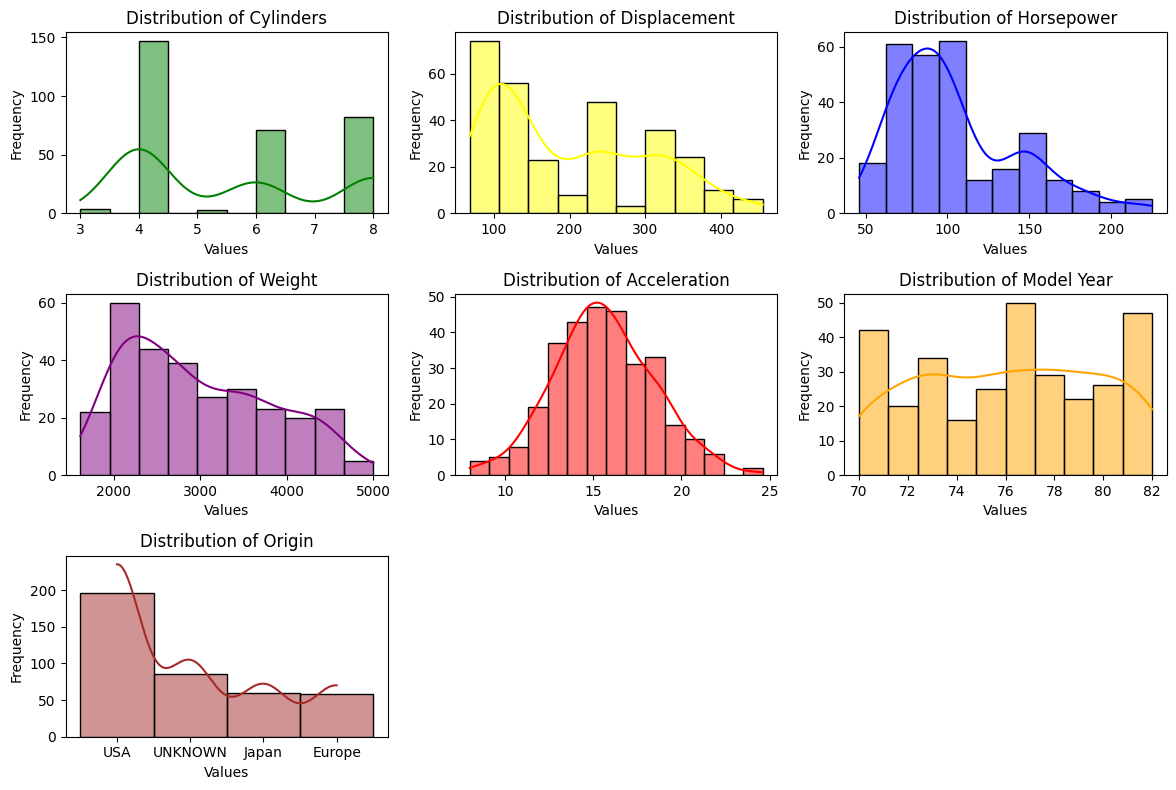

In [14]:
plt.figure(figsize=(12, 8))
colors = ['green', 'yellow', 'blue', 'purple', 'red', 'orange', 'brown']
for i, column in enumerate(X.columns):
    non_zero_values = X[column][X[column] != 0]
    plt.subplot(3, 3, i + 1)
    sns.histplot(non_zero_values, kde=True, color=colors[i])
    plt.title(f'Distribution of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

From the plots above:

- We observe that the numeric column values vary from *3* to *5000*. This variability suggests the need for normalization techniques to bring all of our data within the range of 0-1. Normalization ensures that our machine learning models do not assign disproportionate weight to classes with higher values.
- Regarding the distribution of the Origin column, we notice that USA appears more frequently than Japan and Europe, with Japan and Europe exhibiting similar frequencies. The `UNKNOWN` values can represent other regions such as Asia etc.

#### Visualize Non Zero Numeric Columns Data Distribution #####

In [15]:
X_numeric_colummns = X[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']]

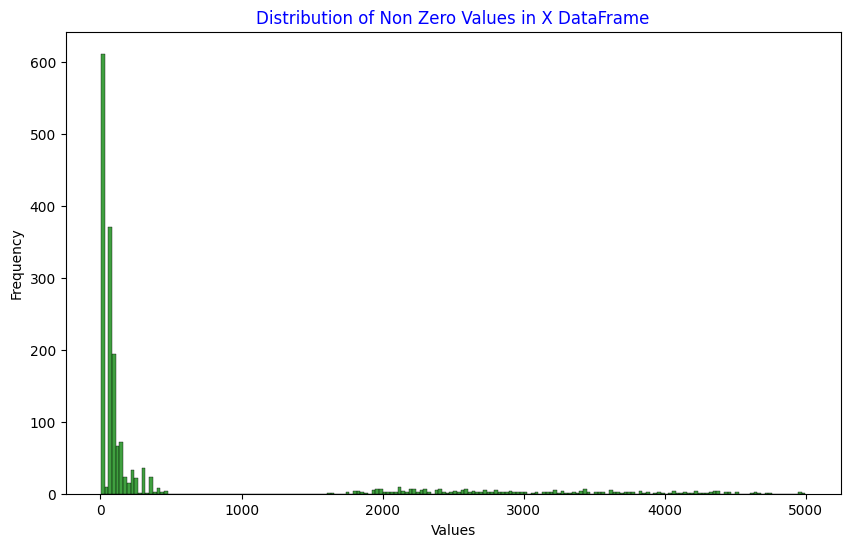

In [16]:
# Flatten the DataFrame into a single column
X_flat_nonzero = X_numeric_colummns.values.flatten()[X_numeric_colummns.values.flatten() != 0]

# Plot the distribution of values
plt.figure(figsize=(10, 6))
sns.histplot(X_flat_nonzero, bins='auto', color='green')
plt.title('Distribution of Non Zero Values in X DataFrame', color='blue')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Assuming X is your DataFrame
X_non_zero_values_df = X_numeric_colummns[X_numeric_colummns != 0]  # Filter out zero values

min_values = X_non_zero_values_df.min()
max_values = X_non_zero_values_df.max()

PRINT("X data frame minimum values:")
PRINT(min_values)

PRINT("\nX data frame maximum values:")
PRINT(max_values)

-------------------------------------------------------------------------------------
X data frame minimum values:
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Cylinders          3.0
Displacement      68.0
Horsepower        46.0
Weight          1613.0
Acceleration       8.0
Model Year        70.0
dtype: float64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------

X data frame maximum values:
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Cylinders          8.0
Displacement     455.0
Horsepower       225.0
Weight          4997.0
Acceleration      24.6
Model Year        82.0
dtype: float64
---------------------------------

In [18]:
min_values = y.min()
max_values = y.max()

PRINT("y data frame minimum values:")
PRINT(min_values)

PRINT("\nX data frame maximum values:")
PRINT(max_values)

-------------------------------------------------------------------------------------
y data frame minimum values:
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
MPG    9.0
dtype: float64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------

X data frame maximum values:
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
MPG    46.6
dtype: float64
-------------------------------------------------------------------------------------


### EDA insights (5pts)

What are you insgits based on the previuse visualization?


Insights:

- We observed that there were *685* `NaN` values in the X DataFrame, which we subsequently replaced with zeros to prepare the data frame for machine learning models.
- Additionally, we noted that there were no zero values present in our X data frame. Therefore, by replacing `NaN` values with zeros, we preserved the data distribution.
- In the X DataFrame, the values range from 3 to almost 5000 (excluding zeros, which were all added).
- In the y DataFrame, the values range from 9 to approximately 47.

### preprocessing (5pts) ###

Apply preprocessing according to your data, handle missing values and split the dataset into train-test as well.
Explain the reason for all methods that you apply.

Make sure that it doesn't affect the data charateristics. Which means that the correlations stay the same (if it was not corelated before it shouldn't be now).

#### Handling Missing Values ####

We already done that step before :)

In [19]:
PRINT(f'Sanity `NaN` check:\n\nThe are {X.isnull().sum().sum()} `NaN` values in X data frame and {y.isnull().sum().sum()} in y data frame')

-------------------------------------------------------------------------------------
Sanity `NaN` check:

The are 0 `NaN` values in X data frame and 0 in y data frame
-------------------------------------------------------------------------------------


In [20]:
label_encoder=LabelEncoder()
X['Origin'] = label_encoder.fit_transform(X['Origin'])

In [21]:
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8.0,307.0,130.0,0.0,12.0,70.0,3
1,8.0,350.0,165.0,3693.0,11.5,70.0,3
2,0.0,318.0,150.0,3436.0,11.0,0.0,2
3,8.0,304.0,0.0,0.0,0.0,70.0,2
4,8.0,302.0,0.0,3449.0,10.5,70.0,3


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

PRINT(f"Shape of X_train: {X_train.shape}")
PRINT(f"Shape of X_test:  {X_test.shape}")
PRINT(f"Shape of y_train: { y_train.shape}")
PRINT(f"Shape of y_test:  {y_test.shape}")

-------------------------------------------------------------------------------------
Shape of X_train: (318, 7)
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Shape of X_test:  (80, 7)
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Shape of y_train: (318, 1)
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Shape of y_test:  (80, 1)
-------------------------------------------------------------------------------------


### Model training and evaluation (10 pts)


Split the data into train-test with 80-20% ratio.
Train the regression tree model on the training set and check it's performance on the test set using two evaluation metrics.
Compare the results and write your conclusion

##### Hyperparameter Tuning #####

In [23]:
regression_tree = DecisionTreeRegressor(random_state=42)

In [24]:
param_grid = {
    'max_depth': [None,5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV Object & preforme grid search to find the best hyperparameters combination
grid_search = GridSearchCV(estimator=regression_tree, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

PRINT(F"Best hyperparameters:\n\n{grid_search.best_params_}")

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
-------------------------------------------------------------------------------------
Best hyperparameters:

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
-------------------------------------------------------------------------------------


In [25]:
best_model = grid_search.best_estimator_

In [26]:
y_pred = best_model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

PRINT(f"Mean Absolute Error:  {mae:.3f}")
PRINT(f"R-squared Score:  {r2:.3f}")

-------------------------------------------------------------------------------------
Mean Absolute Error:  2.647
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
R-squared Score:  0.758
-------------------------------------------------------------------------------------


#### Visualize Prediction vs. Actual Values ####

Text(0.5, 0, 'Actual Value')

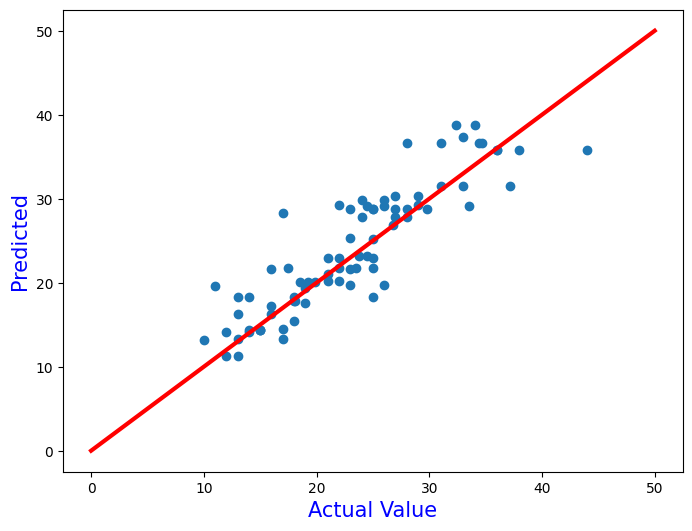

In [28]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred)
plt.plot([0,50],
         [0,50],
         color='r',
         linestyle='-',
         linewidth=3)
plt.ylabel('Predicted', size=15, color='blue')
plt.xlabel('Actual Value', size=15, color='blue')

#### Compere & Conclude ####

The model does a decent job. It's not perfect, but it's pretty close to the actual values most of the time.

The average difference between its predictions and the real outcomes is about 2.647 units. (MAE)

Also, it's able to explain around 75.8% of the differences in the data, which is not bad. So overall, it's doing alright, but there's still some room for improvement. (R2)

### Explainability (10 pts)

1. Use the SHAP tool for explaining how each feature contributes to the model (i,e, explain the training set)
2. Choose 3 different cars  explain thier spesific predictions results (i,e, what was important for this spesific cars)

In [29]:
# Generate expainer object and initialize it with our train dataset
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_train)

In [30]:
PRINT(f'SHAPE values shape -> {np.shape(shap_values.values)}')

-------------------------------------------------------------------------------------
SHAPE values shape -> (318, 7)
-------------------------------------------------------------------------------------


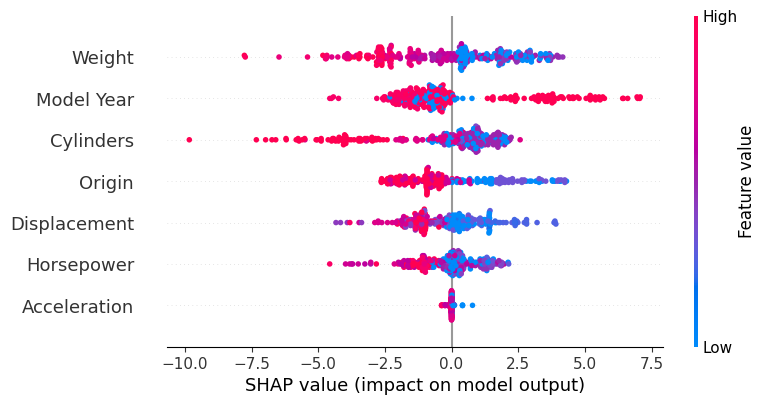

In [31]:
shap.plots.beeswarm(shap_values)

Conclusions:


1. **Low car weight:**
   Lighter cars contribute a lot to predicting fuel efficiency, while heavier cars don't contribute as much. So, when a car is lightweight, it's more likely to be fuel-efficient.

2. **High model year:**
   Newer cars are usually better at predicting fuel efficiency. This means that if a car is newer, it's likely to have better fuel efficiency.

3. **Higher cylinder values:**
   The number of cylinders in a car doesn't really help predict fuel efficiency. So, whether a car has more cylinders or fewer doesn't tell us much about how fuel-efficient it is.

4. **Origin feature (encoded):**
   Where a car comes from doesn't really help us predict fuel efficiency because we changed how we look at that information. So, we don't pay much attention to where a car is made when predicting its fuel efficiency.

5. **Other features:**
   Some other things in the data don't clearly help us predict fuel efficiency. They sometimes make a difference, sometimes not. This means that factors like these aren't very reliable for guessing how fuel-efficient a car will be.he predictions.

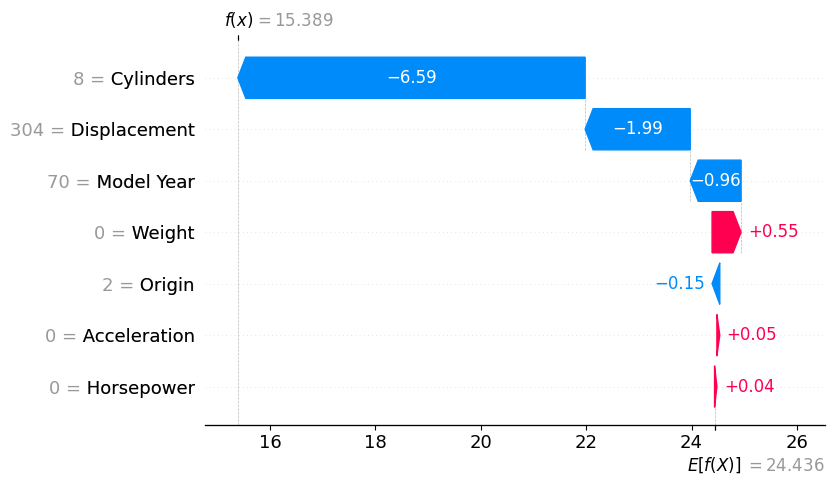

In [32]:
shap.plots.waterfall(shap_values[0])

##### First Car: #####
For this specific car, the number of cylinders has a significant negative impact on its predicted fuel efficiency, with a SHAP value of -6.59. This indicates that the car's high cylinder count substantially decreases its predicted fuel efficiency compared to the average prediction.

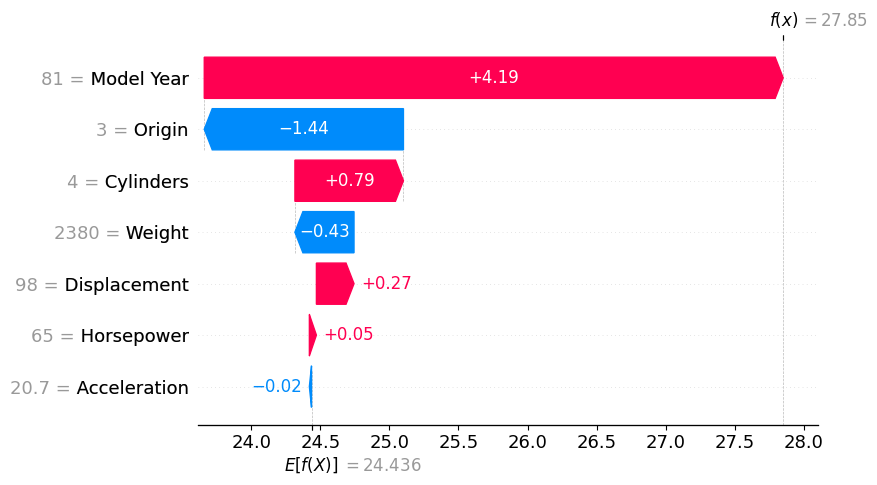

In [33]:
shap.plots.waterfall(shap_values[7])

##### Second Car ######

- The positive SHAP value of +4.19 for "Model year" indicates that its newer production year significantly boosts its predicted fuel efficiency.
- The negative SHAP value of -1.44 for "Origin" suggests that its origin has a slight negative impact on its predicted fuel efficiency, likely due to its encoded representation.
- The small positive SHAP value of +0.79 for "Cylinders" implies that its cylinder count has a minor positive influence on its predicted fuel efficiency.

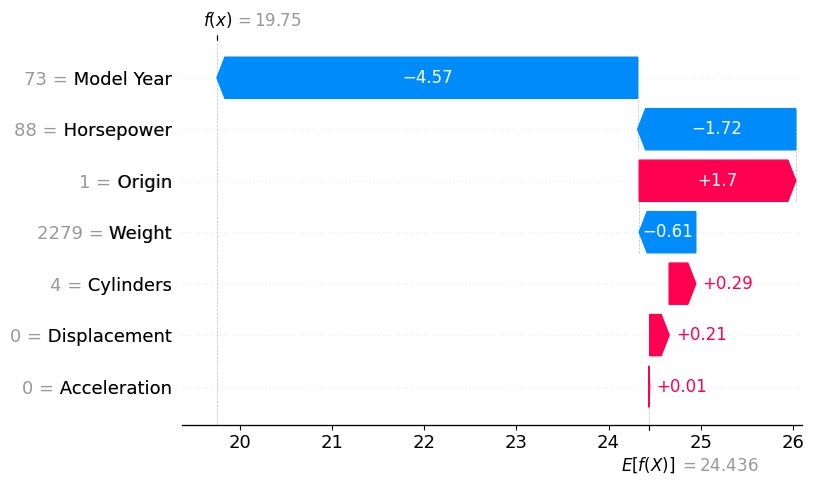

In [34]:
shap.plots.waterfall(shap_values[8])

##### Third Car: #####

- The negative SHAP value of -4.75 for "Model Year" suggests that its older production year significantly decreases its predicted fuel efficiency.
- The negative SHAP value of -1.75 for "Horsepower" indicates that its higher horsepower has a notable negative impact on its predicted fuel efficiency.
- The positive SHAP value of +1.7 for "Origin" implies that its origin has a slight positive influence on its predicted fuel efficie.
- The negative SHAP value of -0.61 for "Weight" suggests that its heavier weight slightly decreases its predicted fuel efficiency.on.

## 2. Classification evaluation (15 points)

Submit question 2 as a PDF file with the calculations, graphs and explainations.

### ROC and precision recall curve (8 pts)

Calculate ROC curve and precision recall curve with the follwing tresholds: [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
The probabilities are:

| label | classifier 1 | classifier 2|
|--------|----------|---------------|
|1|0.41|1.00|
|0	|0.00	|0.72
|0	|0.00	|0.99
|1	|0.73	|0.14
|0	|0.62	|0.00
|1	|1.00	|0.94
|0	|1.00	|0.10
|1	|0.14	|0.77
|0	|0.00	|0.02
|1	|0.55	|1.00






Answer the following questions:
1. Which model is better based on those graphs?
2. If those models predict heart attack, choose a 'one threshold' metric (such as acc, precision, etc..) and explain why it's a suitable metric for this case.

### Curves differences (7 pts)

Create a new table with two columns: 'label' and 'predictions'. Fill the table with 10 rows of values representing binary labels and corresponding predicted probabilities.
Ensure that the values chosen for the predictions are deliberately selected to make the ROC curve and precision-recall curve look different - which means that according to one curve the model is good, and according to the second one it's bad.
After filling the table, draw both the ROC curve and precision-recall curve using the provided data.
Explain the values that you chose and the reason for the change.

## 3. Ensembel (40 pts)

### implement adaBoost (25 pts)
implement the adaboost algorithm from scratch, refer to the lecture slides for the algorithm 43.
you may add any helper functions if needed but make sure to add documentation if you do so.
note, the base_estimator in sklearn supports sample_weight, you may use it if you want to.

In [81]:
from copy import deepcopy

class AdaBoost:
    def __init__(self,givenModel, n_estimators=50):
        self.n_estimators = n_estimators
        self.models = []
        self.alphas = []
        self.givenModel=givenModel

    def fit(self, X, y):
        n_samples, n_features = X.shape
        weights = np.full(n_samples, (1 / n_samples))

        for _ in range(self.n_estimators):
            model = deepcopy(self.givenModel)
            model.fit(X, y, sample_weight=weights)
            predictions = model.predict(X)

            error = np.sum(weights[y != predictions])
            alpha = 0.5 * np.log((1 - error) / (error + 1e-10))

            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)

            self.models.append(model)
            self.alphas.append(alpha)
    def predict(self, X):
        predictions = np.zeros(len(X))
        for alpha, model in zip(self.alphas, self.models):
            predictions += alpha * model.predict(X)
        return np.sign(predictions)
    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

### Model training
train the adaboost model using the synthetic data below, use the following base estimators n_estimators=3,5,10:
1. DecisionTreeClassifier with max_depth=1
2. DecisionTreeClassifier with max_depth=3
3. svm.SVC with kernel='linear'


In [95]:
from sklearn.metrics import accuracy_score,precision_score
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
y[y==0]=-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nEstimators=[3,5,10,100]
classifiers=[]
classifiers.append(DecisionTreeClassifier(max_depth=1))
classifiers.append(DecisionTreeClassifier(max_depth=3))
classifiers.append(SVC(kernel='linear'))
Acc_Pre=[]
for model in classifiers:
  for i in nEstimators:
    adaboost=AdaBoost(model,n_estimators=i)
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    Acc_Pre.append((accuracy,precision))
print(Acc_Pre)

[(0.705, 0.7307692307692307), (0.78, 0.8), (0.81, 0.8064516129032258), (0.875, 0.8571428571428571), (0.825, 0.8), (0.86, 0.845360824742268), (0.91, 0.8969072164948454), (0.95, 0.9207920792079208), (0.87, 0.8349514563106796), (0.87, 0.8349514563106796), (0.87, 0.8349514563106796), (0.875, 0.8431372549019608)]


### Model comparison (5 pts)
compare the models using the following metrics:
1. accuracy
2. precision

In [96]:
for i in range(4):
  PRINT(f'For Decision Tree Classifier with max_depth=1 and {nEstimators[i]} estimators, accuracy: {Acc_Pre[i][0]} and precision: {Acc_Pre[i][1]}')
for i in range(4,8):
  PRINT(f'For Decision Tree Classifier with max_depth=3 and {nEstimators[i-4]} estimators, accuracy: {Acc_Pre[i][0]} and precision: {Acc_Pre[i][1]}')
for i in range(8,12):
  PRINT(f'For Support vector machine with kernel=linear and  {nEstimators[i-8]} estimators, accuracy: {Acc_Pre[i][0]} and precision: {Acc_Pre[i][1]}')

-------------------------------------------------------------------------------------
For Decision Tree Classifier with max_depth=1 and 3 estimators, accuracy: 0.705 and precision: 0.7307692307692307
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
For Decision Tree Classifier with max_depth=1 and 5 estimators, accuracy: 0.78 and precision: 0.8
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
For Decision Tree Classifier with max_depth=1 and 10 estimators, accuracy: 0.81 and precision: 0.8064516129032258
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
For Decision Tree Classifier with max_depth=1 and 100 estimators, accura

### compare number of learners (10 pts)
Choose the best base estimator from the previous section.
Compare the effect of the number of learners on the models error on both the training set and validation set.
use n_estimators = [1,5,10,20,50,100] and plot the error rate for each number of learners.
discuss the results.

We chose DecisionTreeClassifier(max_depth=3) for having the best accuracy and precision overall. as we increase the number of estimators, the accuracy and precision score keeps going up.

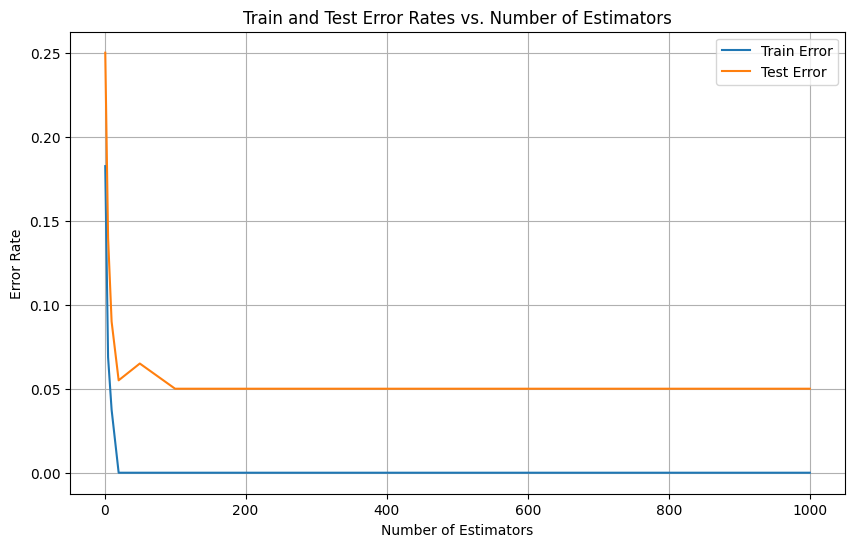

In [97]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [1, 5, 10, 20, 50, 100,1000]
train_errors = []
test_errors = []
Acc_Pre=[]

for n in n_estimators:
    ada_clf=AdaBoost(DecisionTreeClassifier(max_depth=3),n_estimators=n)
    ada_clf.fit(X_train, y_train)
    train_errors.append(1-ada_clf.score(X_train, y_train))
    test_errors.append(1-ada_clf.score(X_test, y_test))
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_errors, label='Train Error')
plt.plot(n_estimators, test_errors, label='Test Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.title('Train and Test Error Rates vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()


By looking at the results, we can see that increasing the amount of estimators, decreses the Error rate for train error until its zero. For the test error rate we see that its decresing as well but doesnt reach zero. We added another learner where n=1000. As we can see the slope for test error rate decreses very much but will never be zero

## 4. SVM (10 points)

Submit question 4 in the pdf file.
Given the following points find and draw the SVM formula (hyperplane formula):

| x1 | x2 | class|
|--------|----------|---------------|
|1|6|-|
|1	|10	|-
|4	|11	|-
|6	|1	|+
|7	|6	|+
|10	|4	|+

Based on the hyperplane, calculate the margin size.